In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# Get the current working directory
current_path = os.getcwd()
# Get the parent directory
parent_directory = os.path.abspath(os.path.join(current_path, os.pardir))
print("Parent Directory:", parent_directory)

Parent Directory: /home/anibal/roman_rubin


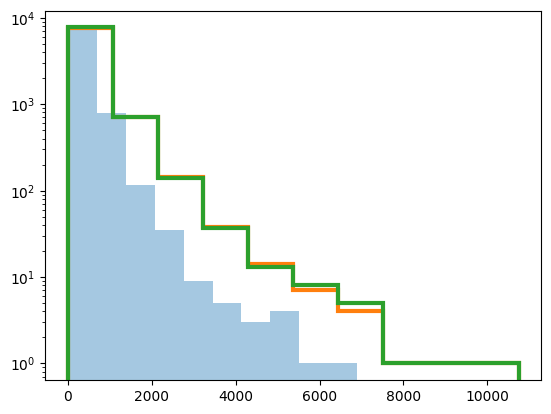

In [37]:
path= parent_directory+'/all_results/PB/'
# true = pd.read_csv(path+"PB_MCprop"+'true_ffp.csv')
# fit_rr = pd.read_csv(path+"PB_MCprop"+'fit_rr_ffp.csv')
# fit_roman = pd.read_csv(path+"PB_MCprop"+'fit_roman_ffp.csv')
fit_rr = pd.read_csv("/home/anibal/roman_rubin/all_results/PB/test_PB/fit_rr.csv")
fit_roman =  pd.read_csv("/home/anibal/roman_rubin/all_results/PB/test_PB/fit_roman.csv")
true = pd.read_csv("/home/anibal/roman_rubin/all_results/PB/test_PB/true.csv")
true['categories']=true['Category']
fit_rr['chi2']=fit_rr['chichi']
fit_roman['chi2']=fit_roman['chichi']
plt.hist(true['te'],alpha=0.4)
plt.hist(fit_rr['te'], histtype='step',lw=3)
plt.hist(fit_roman['te'], histtype='step',lw=3)
plt.yscale('log')

In [38]:
fit_rr.columns

Index(['Source', 'Set', 't0', 'u0', 'te', 'rho', 's', 'q', 'alpha', 'piEN',
       'piEE', 't0_err', 'u0_err', 'te_err', 'rho_err', 's_err', 'q_err',
       'alpha_err', 'piEN_err', 'piEE_err', 'piE', 'piE_err', 'piE_err_MC',
       'mass_thetaE', 'mass_mu', 'mass_thetaS', 'err_mass_thetaE_NotMC',
       'mass_err_thetaE', 'mass_err_mu', 'mass_err_thetaS', 'chichi', 'dof',
       'chi2'],
      dtype='object')

In [39]:
fit_roman['err_mass_thetaE_NotMC']

0       4.558099e+01
1       1.531546e+00
2       4.417444e+04
3       6.671560e+00
4       8.378734e+63
            ...     
8604    9.796272e+00
8605    1.745187e+03
8606    2.312956e+13
8607    2.553204e+01
8608    1.658178e+02
Name: err_mass_thetaE_NotMC, Length: 8609, dtype: float64

In [40]:
fit_roman['mass_err_thetaE'].iloc[0].split()[0]

'18.719945387569012'

In [41]:
fit_roman['mass_thetaE']


0           51.51629628967548 solMass
1          10.611888490937643 solMass
2          0.6592302043546298 solMass
3           65.49413073498842 solMass
4       3.727594492127602e+32 solMass
                    ...              
8604        97.12290864385623 solMass
8605        38.12992456261238 solMass
8606       11719365.103671098 solMass
8607        71.99845014062129 solMass
8608        41.42338108883666 solMass
Name: mass_thetaE, Length: 8609, dtype: object

In [42]:
# mass_thetaE

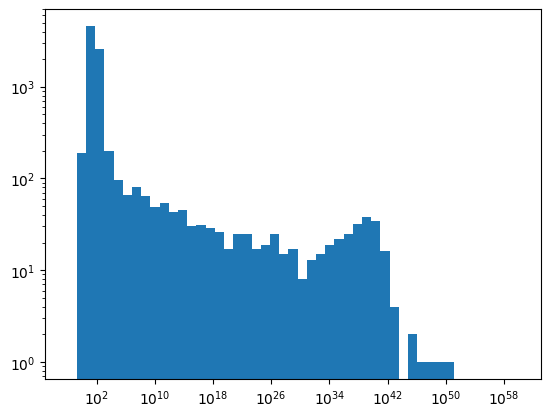

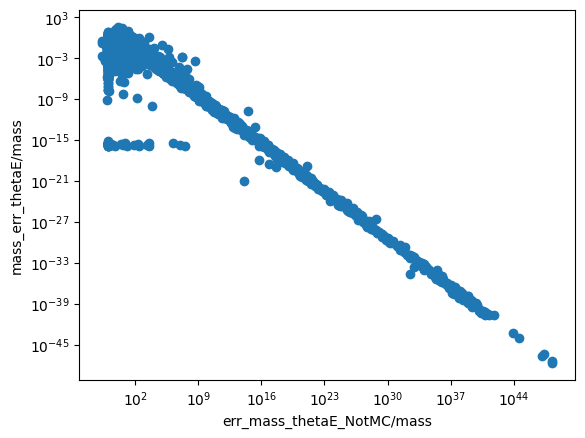

In [43]:
mass_thetaE= np.array([float(fit_roman['mass_thetaE'].iloc[i].split()[0]) for i in range(len(fit_roman))])
plt.hist(mass_thetaE,bins=np.logspace(-2,60,50))
plt.xscale("log")
plt.yscale("log")
plt.show()
sigma_MC_thetaE = np.array([float(fit_roman['mass_err_thetaE'].iloc[i].split()[0]) for i in range(len(fit_roman))])
plt.plot(fit_roman['err_mass_thetaE_NotMC']/mass_thetaE,sigma_MC_thetaE/mass_thetaE, marker='o', ls='')
plt.xlabel('err_mass_thetaE_NotMC/mass')
plt.ylabel('mass_err_thetaE/mass')
plt.yscale('log')
plt.xscale('log')

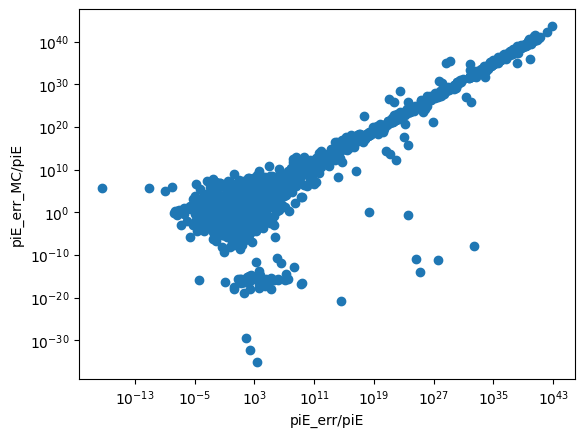

In [44]:
# piE= np.array([float(fit_roman['piE'].iloc[i].split()[0]) for i in range(len(fit_roman))])
# sigma_MC_piE = np.array([float(fit_roman['piE_err_MC'].iloc[i].split()[0]) for i in range(len(fit_roman))])

plt.plot(fit_roman['piE_err']/fit_roman['piE'],fit_roman['piE_err_MC']/fit_roman['piE'], marker='o', ls='')
plt.xlabel('piE_err/piE')
plt.ylabel('piE_err_MC/piE')
plt.yscale('log')
plt.xscale('log')

Text(0.5, 0, 'Number of parameters of the model ')

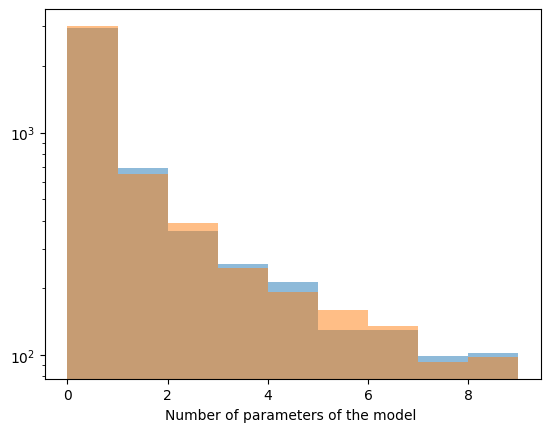

In [45]:
plt.hist(fit_roman['piE_err_MC']/fit_roman['piE'], bins=np.arange(0,10,1),alpha=0.5)
plt.hist(fit_rr['piE_err']/fit_rr['piE'], bins=np.arange(0,10,1),alpha=0.5)
plt.yscale('log')
plt.xlabel("Number of parameters of the model ")

In [46]:
fit_rr.columns

Index(['Source', 'Set', 't0', 'u0', 'te', 'rho', 's', 'q', 'alpha', 'piEN',
       'piEE', 't0_err', 'u0_err', 'te_err', 'rho_err', 's_err', 'q_err',
       'alpha_err', 'piEN_err', 'piEE_err', 'piE', 'piE_err', 'piE_err_MC',
       'mass_thetaE', 'mass_mu', 'mass_thetaS', 'err_mass_thetaE_NotMC',
       'mass_err_thetaE', 'mass_err_mu', 'mass_err_thetaS', 'chichi', 'dof',
       'chi2'],
      dtype='object')

In [47]:
fit_rr["piE"]=np.sqrt(fit_rr["piEE"]**2+fit_rr["piEN"]**2)
fit_roman["piE"]=np.sqrt(fit_roman["piEE"]**2+fit_roman["piEN"]**2)
true["piE"]=np.sqrt(true["piEE"]**2+true["piEN"]**2)

In [48]:
fit_rr

,Source,Set,t0,u0,te,rho,s,q,alpha,piEN,...,mass_thetaE,mass_mu,mass_thetaS,err_mass_thetaE_NotMC,mass_err_thetaE,mass_err_mu,mass_err_thetaS,chichi,dof,chi2
0,0,0,2.461731e+06,1.659002,2336.878997,2.746002e-05,0.542281,0.000001,1.080047e+00,1.421319e-02,...,77.55282640042813 solMass,96.85971832141614 solMass,38.858472450855444 solMass,1.019502e+02,38.65944897951522 solMass,8255.783905431817 solMass,48.470012765851926 solMass,41927.445219,41806,41927.445219
1,3,3,2.462711e+06,0.305609,432.240277,1.955978e-08,3.528562,0.000728,6.677285e-10,4.422513e-20,...,10.611888490937643 solMass,21.223776981874526 solMass,90445.48045274694 solMass,1.261654e+00,0.6987862069609169 solMass,0.7018676220714857 solMass,2.605005789120912 solMass,97755.582648,42398,97755.582648
2,4,4,2.462493e+06,2.345118,0.065317,5.679249e-04,2.071163,0.003548,3.143892e-01,1.964820e-04,...,7.79956350729836 solMass,0.027582682969751703 solMass,6.278346296854516 solMass,2.390135e+04,0.004904180379661351 solMass,9.16877054069287e-06 solMass,0.005167561988821536 solMass,42302.167051,41593,42302.167051
3,9,9,2.462647e+06,1.090810,835.461086,9.220947e-06,0.111871,0.000002,9.826370e-01,3.351875e-02,...,62.88717762676416 solMass,86.56345039267582 solMass,213.47083421097977 solMass,7.884059e+00,4.856850735917009 solMass,1.6523879165633233 solMass,15.407152442699726 solMass,50537.109911,42398,50537.109911
4,10,10,2.462046e+06,2.331344,260.129443,2.418505e-04,0.277043,0.000802,3.141593e+00,3.834421e-41,...,2.2693592346971864e+39 solMass,4.538718469394371e+39 solMass,1.1347136986868884e+39 solMass,4.147634e+77,29.567076188372162 solMass,500.5840095773317 solMass,64.61155402831756 solMass,958351.513276,42395,958351.513276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,4982,4982,2.461627e+06,0.786069,468.013903,1.665933e-04,0.904132,0.000040,2.469273e+00,2.006977e-03,...,96.92995027625031 solMass,96.8656051740193 solMass,63.82323856436849 solMass,9.759926e+00,1.1347385590239836 solMass,174.09329912522702 solMass,1.06727772049239 solMass,42630.785631,42398,42630.785631
8605,4983,4983,2.463104e+06,2.127716,187.461000,8.919178e-05,1.330501,0.000008,1.456216e+00,2.492533e-03,...,38.135136360463356 solMass,36.390459361817236 solMass,45.22308637535722 solMass,2.979466e+02,13.337238045988535 solMass,0.014018503277870922 solMass,53.64282214921403 solMass,42105.939065,42006,42105.939065
8606,4987,4987,2.462533e+06,1.399879,271.565496,3.483627e-04,0.335809,0.000203,3.141592e+00,1.472440e-35,...,1.0999589872976019e+24 solMass,1.4264673151759712e+24 solMass,5.690343656557085e+23 solMass,1.788997e+47,23.911140876431904 solMass,33.07242219257087 solMass,47.11051250126703 solMass,41690.404993,42210,41690.404993
8607,4990,4990,2.462736e+06,1.507216,2449.527088,5.417825e-05,0.817443,0.000230,4.349108e-15,3.084194e-42,...,71.99845014062129 solMass,143.99690028124255 solMass,36.00065163598697 solMass,1.855581e+01,24.279209149439524 solMass,250.35638416306207 solMass,49.12616057694775 solMass,41782.920110,41573,41782.920110


In [49]:
# plt.hist(fit_rr['chi2'],bins=30)
# plt.yscale('log')

In [50]:
met_1_rr = pd.DataFrame(columns = true.columns)
met_1_roman= pd.DataFrame(columns = true.columns)
met_2_rr = pd.DataFrame(columns = true.columns)
met_2_roman= pd.DataFrame(columns = true.columns)
met_3_rr = pd.DataFrame(columns = true.columns)
met_3_roman= pd.DataFrame(columns = true.columns)
err_ratio= pd.DataFrame(columns = true.columns)
residuals_ratio= pd.DataFrame(columns = true.columns)

err_ratio['Source'] = true['Source']
residuals_ratio['Source'] = true['Source']
met_1_roman['Source'] = true['Source']
met_1_rr['Source'] = true['Source']
met_2_roman['Source'] = true['Source']
met_2_rr['Source'] = true['Source']
met_3_roman['Source'] = true['Source']
met_3_rr['Source'] = true['Source']

keys = ['t0','u0','te','rho','s',
        'q','alpha','piEN','piEE','piE']

for key in keys:
    met_1_rr[key] = abs(true[key]-fit_rr[key])/true[key]
    met_1_roman[key] = abs(true[key]-fit_roman[key])/true[key]
    met_2_rr[key] = abs(true[key]-fit_rr[key])/fit_rr[key+'_err']
    met_2_roman[key] = abs(true[key]-fit_roman[key])/fit_roman[key+'_err']
    met_3_rr[key] = abs(fit_rr[key+'_err']/fit_rr[key])
    met_3_roman[key] = abs(fit_roman[key+'_err']/fit_roman[key])
    err_ratio[key]=abs(fit_rr[key+'_err'])/fit_roman[key+'_err']
    residuals_ratio[key]=abs(fit_rr[key+'_err'])/fit_roman[key+'_err']

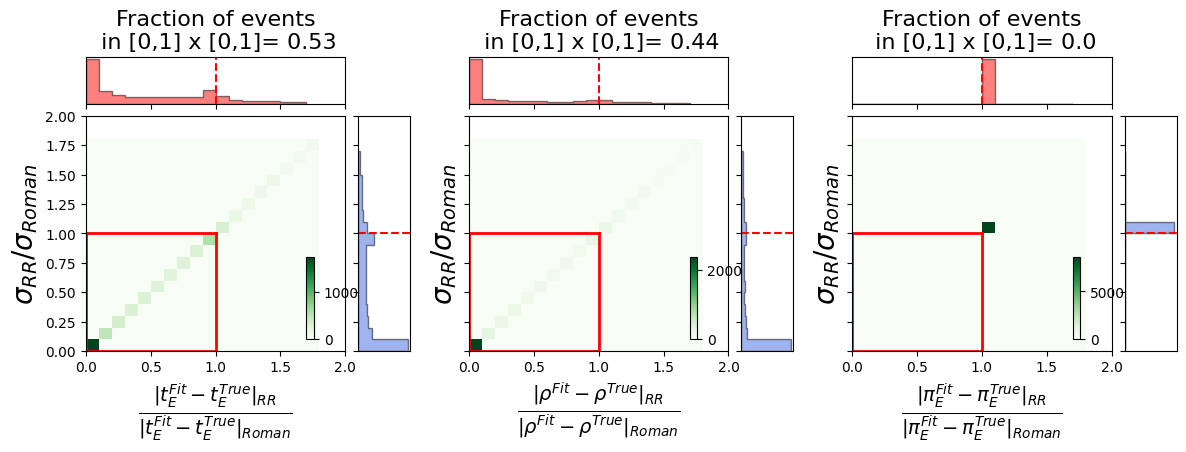

In [51]:

def create_hist2d_with_marginals(ax, x, y, labels, p, first_col=False):

    tex_label = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piE':'\pi_{E}', 'piEN':'\pi_{EN}'}
    # Main scatter plot
    hb = ax.hist2d(x, y, bins=(np.arange(0, 1.9, 0.1), np.arange(0, 1.9, 0.1)), cmap='Greens')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)

    # Create inset axes for the histograms
    ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
    ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

    # Histogram settings
    binwidth = 0.1
    ax_histx.hist(x, bins=np.arange(0, 1.8, binwidth), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='red')
    ax_histy.hist(y, bins=np.arange(0, 1.8, binwidth), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')

    # Remove ticks from inset histograms
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.tick_params(axis="y", left=False, labelleft=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
    # ax_histy.set_yscale("log")
    # Add vertical and horizontal lines
    ax_histx.axvline(1, color='red', ls='--')
    ax_histy.axhline(1, color='red', ls='--')
    ax.axvline(1, ymin=0, ymax=0.5, lw=2, color='red')
    ax.axvline(0, ymin=0, ymax=0.5, lw=2, color='red')
    ax.axhline(0, xmin=0, xmax=0.5, lw=2, color='red')
    ax.axhline(1, xmin=0, xmax=0.5, lw=2, color='red')

    # Set labels with LaTeX formatting
    # label_m1 = lambda p: r'$\frac{|' + f'{labels[p]}' + r'^{true}-' + f'{labels[p]}' + r'^{fit}|_{RR}}{|' + f'{labels[p]}' + r'^{true}-' + f'{labels[p]}' + r'^{fit}|_{R}}$'
    # label_m2 = r'$\frac{\sigma_{RR}}{\sigma_{Roman}}$'
    labelx, labely =labels[0],labels[1]
    ax.set_xlabel(labelx, fontsize=20)
    
    # ax.set_xlabel("a",fontsize=20)
    # if first_col:
    ax.set_ylabel(labely, fontsize=20)

    # Add a colorbar inside the main plot
    cax = ax.inset_axes([0.85, 0.05, 0.03, 0.35], transform=ax.transAxes)
    cbar = plt.colorbar(hb[3], cax=cax, orientation='vertical')
    # cax.set_yticks([0, 50, 1000])
    # cax.set_yticklabels([0, 100, 2000], fontsize=8)
    x_min=0
    x_max=1
    y_min=0
    y_max=1
    fil_x= x[(y<1)&(y>0)]
    filtered=fil_x[(fil_x<1)&(fil_x>0)]

    number_in_square = len(filtered)/len(y)
    text = f"Fraction of events\n in [{x_min},{x_max}] x [{y_min},{y_max}]= {round(number_in_square ,2)}"  # Insert the number here
    ax.set_title(text, fontsize = 16)

# Example usage
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1,1, 1]})
x = residuals_ratio['te']
y = err_ratio['te']
x2 = residuals_ratio['rho']
y2 = err_ratio['rho']
x3 = residuals_ratio['piE']
y3 = err_ratio['piE']
# print(x3)

create_hist2d_with_marginals(axes[0], x, y, ["$\\frac{|t_E^{Fit}-t_E^{True}|_{RR} }{ |t_E^{Fit}-t_E^{True}|_{Roman}}$","$\\sigma_{RR}/\\sigma_{Roman}$"], 'te', first_col=True)
create_hist2d_with_marginals(axes[1], x2, y2, ["$\\frac{|\\rho^{Fit}-\\rho^{True}|_{RR} }{ |\\rho^{Fit}-\\rho^{True}|_{Roman}}$","$\\sigma_{RR}/\\sigma_{Roman}$"], 'rho')
create_hist2d_with_marginals(axes[2], x3, y3, ["$\\frac{|\\pi_E^{Fit}-\\pi_E^{True}|_{RR} }{ |\\pi_E^{Fit}-\\pi_E^{True}|_{Roman}}$","$\\sigma_{RR}/\\sigma_{Roman}$"], 'piE')

plt.tight_layout()
plt.show()

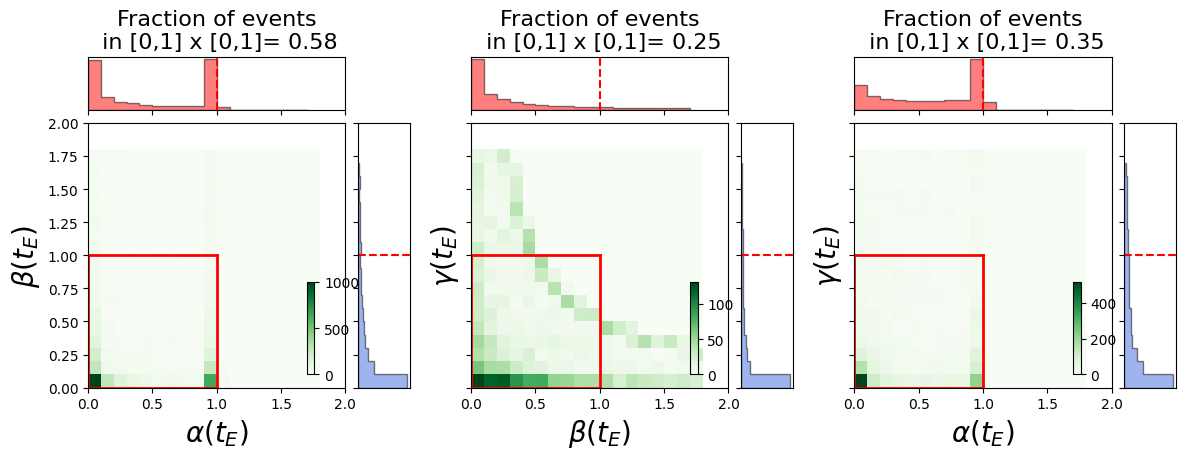

In [52]:

# Example usage
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1,1, 1]})
x = met_1_rr['te']
y = met_2_rr['te']
x2 = met_2_rr['te']
y2 = met_3_rr['te']
x3 = met_1_rr['piE']
y3 = met_3_rr['piE']
# print(x3)
labels = {'t0':'t_0', 'u0':'u_0', 'te':'t_E','rho':'\\rho', 's':'s', 'q':'q', 'alpha':'\\alpha', 'piE':'\pi_{E}', 'piEN':'\pi_{EN}'}

p='te'
create_hist2d_with_marginals(axes[0], x, y, ['$\\alpha$'+f"(${labels[p]}$)",r'$\beta$'+f"(${labels[p]}$)"], p, first_col=True)
create_hist2d_with_marginals(axes[1], x2, y2, ['$\\beta$'+f"(${labels[p]}$)",r'$\gamma$'+f"(${labels[p]}$)"], p)
create_hist2d_with_marginals(axes[2], x3, y3, ['$\\alpha$'+f"(${labels[p]}$)",r'$\gamma$'+f"(${labels[p]}$)"], p)

plt.tight_layout()
plt.show()

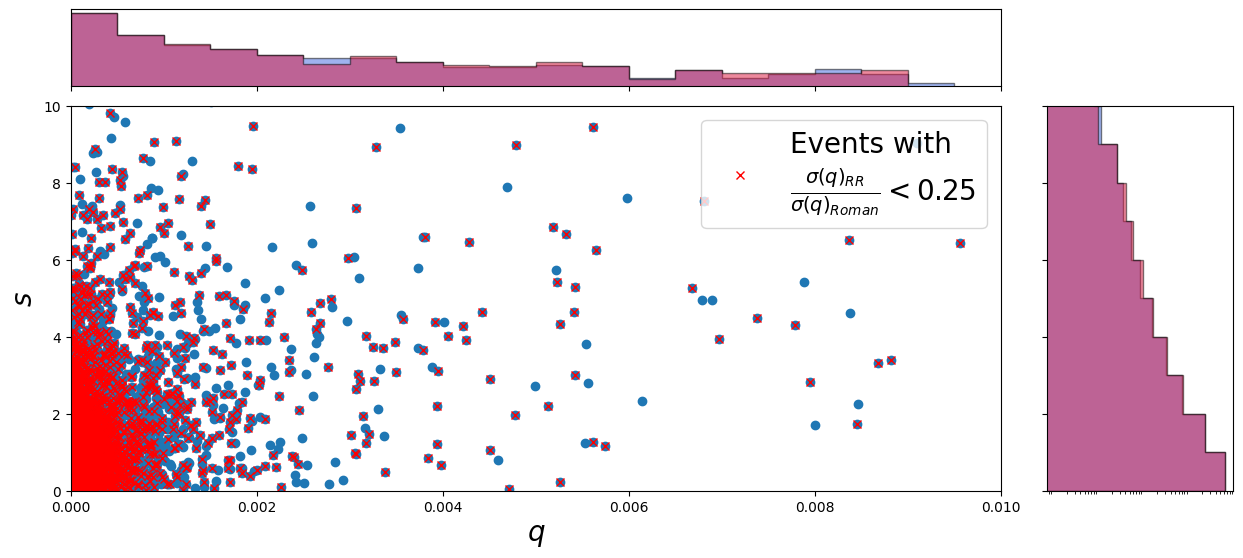

In [53]:
labelsparams = lambda p: labels[p]

label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'
label_m2 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'

fig, ax = plt.subplots(1, 1, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1]})

q='te'
ax.plot(true['q'], true['s'], marker='o', ls='') #,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.plot(true['q'][true['Source'].isin(err_ratio['Source'][err_ratio['q']<0.25])], true['s'][true['Source'].isin(err_ratio['Source'][err_ratio['q']<0.25])], marker='x',ls='',color='red',label='Events with\n'+r'$\frac{\sigma(q)_{RR}}{\sigma(q)_{Roman}}<0.25$')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.set_xlabel(r'$q$',fontsize=20)
ax.set_ylabel(r'$s$',fontsize=20)
ax.set_xlim(0,0.01)
ax.set_ylim(0,10)

ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

# Histogram settings
#binwidth = 0.1
ax_histx.hist(true['q'], bins=np.arange(0, 0.01, 0.0005), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue')
ax_histx.hist(true['q'][true['Source'].isin(err_ratio['Source'][err_ratio['q']<0.25])], bins=np.arange(0, 0.01, 0.0005), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson')

ax_histy.hist(true['s'], bins=np.arange(0, 18, 1), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')
ax_histy.hist(true['s'][true['Source'].isin(err_ratio['Source'][err_ratio['q']<0.25])], bins=np.arange(0, 18, 1), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson', orientation='horizontal')

ax_histy.set_xscale("log")
ax_histx.set_yscale("log")

# Remove ticks from inset histograms
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.tick_params(axis="y", left=False, labelleft=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
ax.legend(loc='best',fontsize=20)


/home/anibal/anaconda3/envs/pyLIMA_utd/lib/python3.11/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


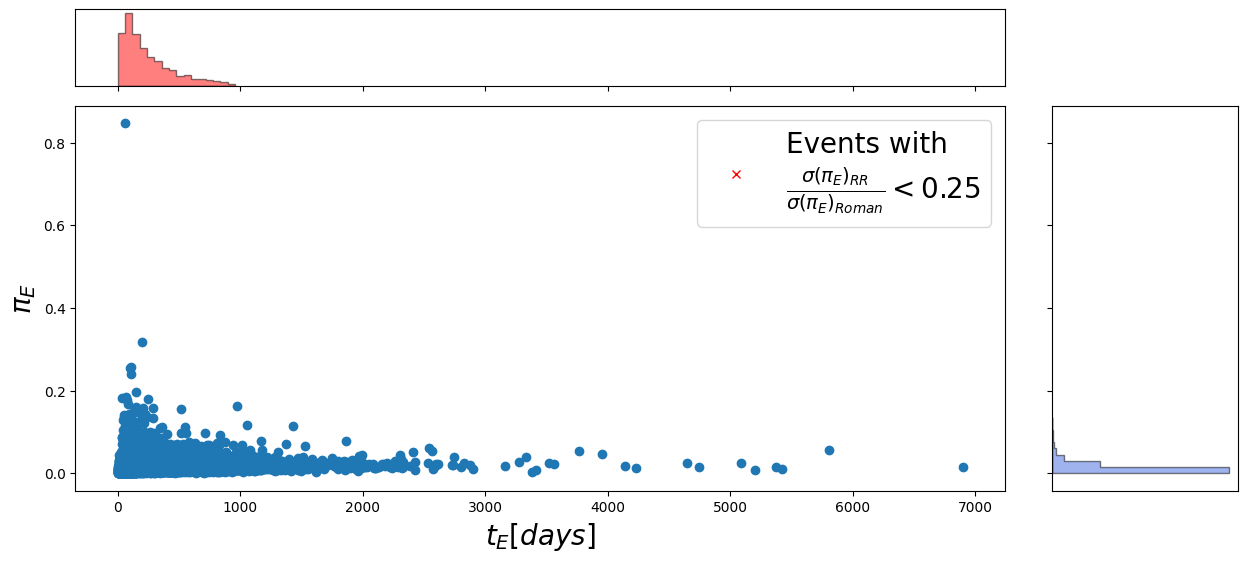

In [54]:
labelsparams = lambda p: labels[p]

label_m3 = lambda p :r'$\frac{\sigma_{'+f'{labels[p]}'+'}}{'+f'{labels[p]}'+'^{fit}}$'#+f'{labels[p]}'+'}}$'

label_m2 = lambda p :r'$\frac{|'+f'{labels[p]}'+'^{true}-'+f'{labels[p]}'+'^{fit}|}{\sigma_{'+f'{labels[p]}'+'}}$'
fig, ax = plt.subplots(1, 1, figsize = (12, 5), sharey=True, gridspec_kw={'width_ratios': [1]})

q='te'
ax.plot(true['te'],true['piE'],marker='o',ls='')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.plot(true['te'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])], true['piE'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])],marker='x',ls='',color='red',label='Events with\n'+r'$\frac{\sigma(\pi_E)_{RR}}{\sigma(\pi_E)_{Roman}}<0.25$')#,bins=np.linspace(min(true[q]), max(true[q]),15))
ax.set_xlabel(r'$t_E [days]$',fontsize=20)
ax.set_ylabel(r'$\pi_E$',fontsize=20)

ax_histx = ax.inset_axes([0, 1.05, 1, 0.2], sharex=ax)
ax_histy = ax.inset_axes([1.05, 0, 0.2, 1], sharey=ax)

# Histogram settings
#binwidth = 0.1
ax_histx.hist(true['te'], bins=np.arange(0, 1000, 60), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='red')
ax_histx.hist(true['te'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])], bins=np.arange(0, 1000, 60), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='blue')

ax_histy.hist(true['piE'], bins=np.arange(0, 0.15, 0.015), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='royalblue', orientation='horizontal')
ax_histy.hist(true['piE'][true['Source'].isin(err_ratio['Source'][err_ratio['piE']<0.25])], bins=np.arange(0, 0.15, 0.015), density=True, histtype='stepfilled', edgecolor='k', fill=True, alpha=0.5, color='crimson', orientation='horizontal')

#ax_histy.set_xscale("log")
# Remove ticks from inset histograms
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histx.tick_params(axis="y", left=False, labelleft=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.tick_params(axis="x", bottom=False, labelbottom=False)
ax.legend(loc='best',fontsize=20)


In [55]:
%matplotlib inline
plt.close("all")
def plot_histogram(ax, data, p, colors, some_flag=False):
    # print(data)
    sources = data['Source'].values
    data = data[p]   
    lab_latex = {'te':'tE(days)','rho':'\\rho' ,'piE':'\pi_E','q':'q'}
    data_label = lab_latex[p]
    lab_latex_legend = {'te':'t_E','rho':'\\rho','piE':'\pi_E','q':'q'}
    xlabel=r'$log_{10}'+f"[{lab_latex[p]}]$"
    
    masks_rr = lambda p, label: [
        (met_1_rr[p][met_1_rr['Source'].isin(sources)] < 0.25, 'r', f"$\\alpha({label})<0.25$"),
        (met_2_rr[p][met_2_rr['Source'].isin(sources)] < 0.25, 'k', f"$\\beta({label})<0.25$"),
        (met_3_rr[p][met_3_rr['Source'].isin(sources)] < 0.25, 'g', f"$\\gamma({label})<0.25$"),
    ]
    masks_roman = lambda p, label:[
        (met_1_roman[p][met_1_roman['Source'].isin(sources)] < 0.25, 'r', f"$\\alpha({label})<0.25$"),
        (met_2_roman[p][met_2_roman['Source'].isin(sources)] < 0.25, 'k', f"$\\beta({label})<0.25$"),
        (met_3_roman[p][met_3_roman['Source'].isin(sources)] < 0.25, 'g', f"$\\gamma({label})<0.25$"),
    ]
    
    if some_flag:
        masks = masks_roman(p,lab_latex_legend[p])
        dataset = 'Roman'
        met_1 = met_1_roman[met_1_roman['Source'].isin(sources)]
        met_2 = met_2_roman[met_2_roman['Source'].isin(sources)]
        met_3 = met_3_roman[met_3_roman['Source'].isin(sources)]
    else:
        masks = masks_rr(p,lab_latex_legend[p])
        dataset = 'Roman and Rubin'
        met_1 = met_1_rr[met_1_rr['Source'].isin(sources)]
        met_2 = met_2_rr[met_2_rr['Source'].isin(sources)]
        met_3 = met_3_rr[met_3_rr['Source'].isin(sources)]

    # Plot the histogram of the true values
    ax.hist(np.log10(data), bins=30, color='royalblue', alpha=0.5, label=f'True value of ${lab_latex_legend[p]}$')
    
    # Iterate over the masks and plot the masked data
    for (mask, color, label) in masks:
        # Select the masked data based on the condition in the mask
        # print(label)
        masked_data = data[mask]
        ax.hist(np.log10(masked_data), 
                bins=30, histtype='step', color=color, lw=2, label=label)
    
    # Set labels and title
    # print(xlabel)
    ax.set_xlabel(xlabel, fontsize=20)
    

    ax.set_title('Percentage of events with:\n'+
                 f"$\\alpha({lab_latex_legend[p]})<0.25: $"+
                 f"{round(100*len(met_1[p][met_1[p]<0.25])/len(data),2)}%, "+'\n'+
                 f"$\\beta({lab_latex_legend[p]})<0.25: $"+f"{round(100*len(met_2[p][met_2[p]<0.25])/len(data),1)}%, "+'\n'+
                 f"$\\gamma({lab_latex_legend[p]})<0.25: $"+f"{round(100*len(met_3[p][met_3[p]<0.25])/len(data),2)}%",fontsize=15)
    
    ax.legend(fontsize=10)
    # ax.set_xticks([1,2,3,4],fontsize=12)
    
    ax.grid()
    

In [56]:
# mask_true

In [57]:
# len(set(fit_rr['Source'][fit_rr['p_value']>0.05]).intersection(set(fit_roman['Source'][fit_roman['p_value']>0.05])))

/tmp/ipykernel_14441/3054319465.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()# Adjust the layout to avoid overlapping


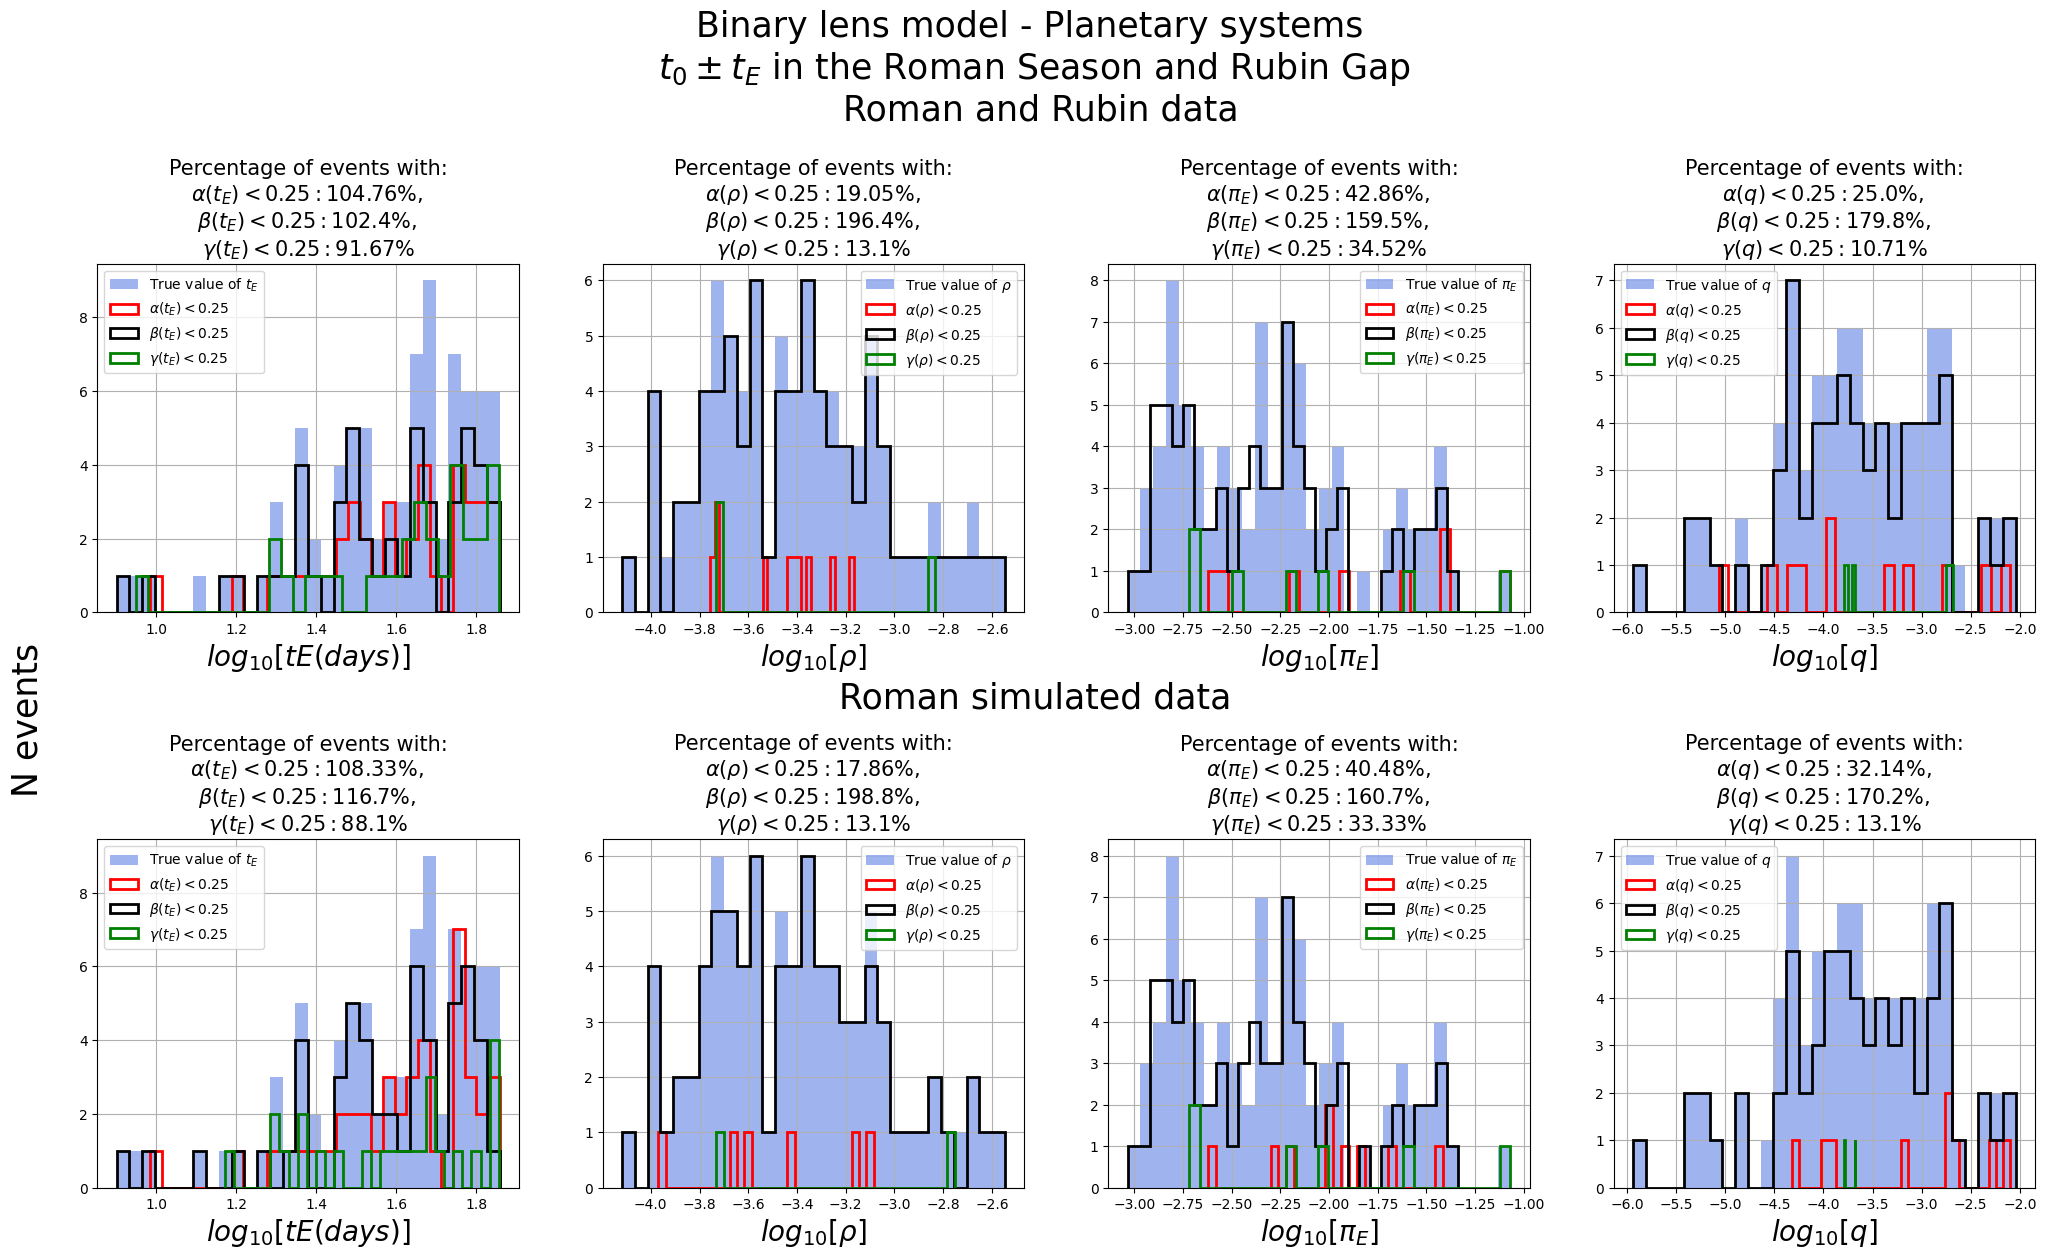

In [58]:
fig, axes = plt.subplots(2, 4, figsize=(25, 12), gridspec_kw={'hspace': 0.65})
cat = 'C'
mask = (true["categories"] == cat) #& (true['Source'].isin(fit_rr['Source'][fit_rr['p_value']>0.05].values))
# mask = np.ones(len(true),dtype=bool)

true_df=true[mask]
# display(true_df)
# print(fit_rr['p_value'][fit_rr['Source']==5035])
# Plotting histograms

p = 'te'
plot_histogram(axes[0, 0], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 0], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
p = 'rho'
plot_histogram(axes[0, 1], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 1], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
p = 'piE'
plot_histogram(axes[0, 2], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 2], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
p = 'q'
plot_histogram(axes[0, 3], true_df, p, colors=['k', 'r', 'g'], some_flag=False)
plot_histogram(axes[1, 3], true_df, p, colors=['k', 'r', 'g'], some_flag=True)
cats_label = {'A':'Overlap of the Observing Seasons of Roman and Rubin', 'B':'Rubin Season and Roman Gap', 'C':'Roman Season and Rubin Gap', 'D':'Roman Gap and Rubin gap'}
# Add titles for each row
fig.text(0.5, 1, 'Binary lens model - Planetary systems \n$t_0 \pm t_E$ in the '+ cats_label[cat]+'\n Roman and Rubin data', ha='center', fontsize=25)
fig.text(0.5, 0.51, 'Roman simulated data', ha='center', fontsize=25)
# Add common Y label
fig.text(0.1-0.01, 0.5, 'N events', va='center', rotation='vertical', fontsize=25)
plt.tight_layout()# Adjust the layout to avoid overlapping


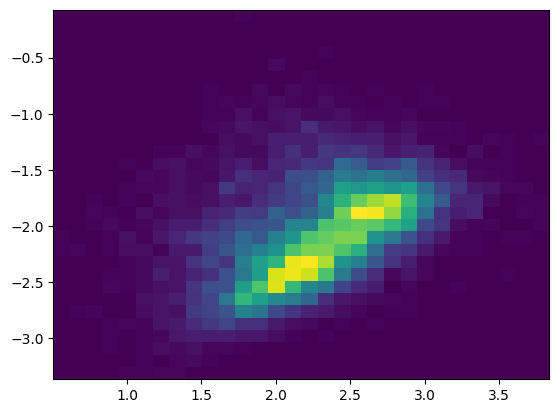

In [59]:
plt.hist2d(np.log10(true['te']),np.log10(true['piE']),bins=30)
plt.show()

In [60]:
met_1_rr

,Source,Set,t0,u0,te,rho,s,q,alpha,piEN,piEE,Category,categories,piE
0,0,NaN,4.062166e-06,0.347716,0.248951,0.995777,0.056492,0.883267,12.405502,0.231832,-1.000000,NaN,NaN,0.249194
1,3,NaN,4.060582e-06,0.558678,1.000000,0.999883,1.000000,1.000000,1.000000,1.000000,-1.000000,NaN,NaN,0.901612
2,4,NaN,4.053658e-06,0.999144,0.996464,0.242296,0.806568,0.998493,0.722406,0.993762,-0.381516,NaN,NaN,0.844774
3,9,NaN,4.060654e-06,0.462341,0.376488,0.705406,0.858040,0.940765,0.008623,0.460870,0.655013,NaN,NaN,0.388065
4,10,NaN,4.061645e-06,0.096381,1.000000,0.999940,0.064611,0.999998,23.283273,1.000000,-1.000000,NaN,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,4982,NaN,6.109000e-09,0.000823,0.000664,0.518725,0.999794,0.964092,0.148940,0.004326,0.002275,NaN,NaN,0.002319
8605,4983,NaN,4.038360e-06,0.139299,0.045750,0.156733,0.626376,0.999883,0.345705,0.999869,-0.999702,NaN,NaN,0.999721
8606,4987,NaN,4.060842e-06,0.438027,0.296837,0.933027,0.598922,0.996875,0.987170,1.000000,-1.000000,NaN,NaN,1.000000
8607,4990,NaN,4.060541e-06,0.355083,1.000000,0.999921,1.000000,1.000000,1.000000,1.000000,-1.000000,NaN,NaN,0.494595


(array([8.605e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

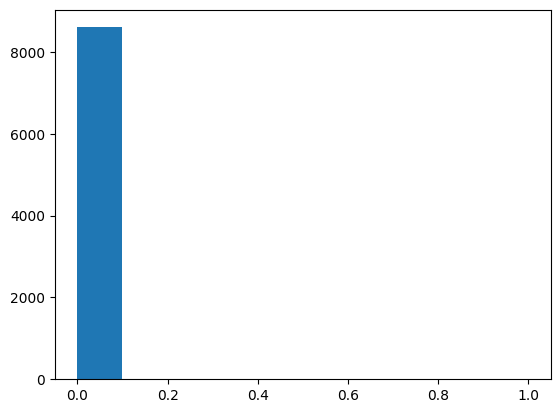

In [71]:
min_value, max_value = 9.999, 10.001

# Count how many columns in each row have values within the specified range

df_copy = met_1_rr.copy()
df_copy['in_range_count'] = df_copy.apply(lambda row: row.between(min_value, max_value).sum(), axis=1)

# print(df_copy)
# met_1_rr['in_range_count'] = met_1_rr.apply(lambda row: row.between(min_value, max_value).sum(), axis=1)

plt.hist(df_copy['in_range_count'])

In [ ]:
# len(met_1_rr['te'][~met_1_rr['te'].between(0.999, 1.001)])


In [ ]:
labelsparams = lambda p: labels[p]

label_m1 = lambda p: f'$\\alpha({labels[p]})$'
label_m3 = lambda p :f'$\\gamma({labels[p]})$'
label_m2 = lambda p :f'$\\beta({labels[p]})$'
# cats_label = {'A':'Overlap of the Observing Seasons of Roman and Rubin', 'B':'Rubin Season and Roman Gap', 'C':'Roman Season and Rubin Gap', 'D':'Roman Gap and Rubin gap'}

# cats_labels = {'A': 'Overlap seasons Roman and Rubin', 'B': 'Roman gap and Rubin season','C': 'gap Roman and gap Rubin', 'D': 'Season Roman and gap Rubin'}
# Function to plot histograms and annotations
def plot_histogram(ax, data1, data2, xlabel, title,limit):
    # ax.set_title(title)
    ax.hist(data1, bins=np.arange(0, 1.1, 0.1), edgecolor="k",lw=0.2, alpha=0.4, label='Roman+Rubin')
    ax.hist(data2, bins=np.arange(0, 1.1, 0.1), edgecolor="k",lw=0.2, alpha=0.4, label='Roman')
    ax.set_xlabel(xlabel, fontsize=20)
    ax.axvline(limit, color='red', linestyle='--')
    ax.legend(loc='best')
    
    fraction_data1 = len(data1[data1 < limit]) / len(data1)
    fraction_data2 = len(data2[data2 < limit]) / len(data2)
    
    ax.annotate(f'Fraction of events Roman+Rubin\nwith {xlabel}<{str(limit)} = {fraction_data1:.2f}', 
                xy=(0.5, -0.3), xycoords='axes fraction',
                ha='center', va='center', fontsize=15)
    ax.annotate(f'Fraction of events Roman\nwith {xlabel}<{str(limit)} = {fraction_data2:.2f}', 
                xy=(0.5, -0.45), xycoords='axes fraction',
                ha='center', va='center', fontsize=15)
    
categories = ['A', 'B', 'C']
datasets = [(met_1_rr, met_1_roman), (met_2_rr, met_2_roman), (met_3_rr, met_3_roman)]
label_functions = [label_m1, label_m2, label_m3]  # Corresponding label functions for each dataset

# Define the limit values for each label function
limits = {label_m1: 0.1, label_m2: 1, label_m3: 0.25}

# Parameters for the histograms
params = [('te', r'$t_E$'), ('rho', r'$\rho$'), ('piE', r'$\pi_E$')]

# Loop through the datasets and categories
for i, (rr, roman) in enumerate(datasets):
    label_func = label_functions[i]  # Dynamically choose the correct label function
    limit = limits[label_func]  # Set the limit based on the label function
    
    for cat in categories:
        fig, axes = plt.subplots(1, 3, figsize=(18, 7))

        # Add a title for the figure
        plt.suptitle(f'Category: {cats_label[cat]}')# (Dataset {i+1})')

        # Filter based on the category
        mask = rr['Source'].isin(true['Source'][true['categories'] == cat])

        # Loop through the parameters for each axis
        for j, (p, label) in enumerate(params):
            plot_histogram(axes[j], rr[p][mask], roman[p][mask], label_func(p), label, limit)

        # Add grids and adjust the layout
        for ax in axes:
            ax.grid()
        plt.tight_layout()

        # Show the plot
        plt.show()


In [ ]:
# Define the categories, datasets, and label functions to iterate over


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define your labeling functions (remains unchanged)
labels = { 'te': r'$t_E$', 'rho': r'$\rho$', 'piE': r'$\pi_E$' }

# Define your limit values for each parameter
limits = {'te': 0.1, 'rho': 1, 'piE': 0.25}

# Function to calculate the fractions
def calculate_fractions(data1, data2, limit):
    fraction1 = np.sum(data1 < limit) / len(data1)  # Fraction for dataset 1
    fraction2 = np.sum(data2 < limit) / len(data2)  # Fraction for dataset 2
    return fraction1, fraction2

# Categories and datasets
categories = ['A', 'B', 'C']
datasets = [(met_1_rr, met_1_roman), (met_2_rr, met_2_roman), (met_3_rr, met_3_roman)]
params = [('te', r'$t_E$'), ('rho', r'$\rho$'), ('piE', r'$\pi_E$')]

# Create a bar plot for fractions
for p, xlabel in params:
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.suptitle(f'Fraction of Events Inside Limit for {xlabel}', fontsize=20)

    # Store fractions for each category
    fractions = []

    # Loop through categories and datasets
    for cat in categories:
        rr_data = datasets[0][0][datasets[0][0]['Source'].isin(true['Source'][true['categories'] == cat])][p]
        roman_data = datasets[0][1][datasets[0][1]['Source'].isin(true['Source'][true['categories'] == cat])][p]
        
        fraction_rr, fraction_roman = calculate_fractions(rr_data, roman_data, limits[p])
        fractions.append((fraction_rr, fraction_roman))
    
    # Prepare data for bar plot
    labels = [f'{cat} RR' for cat in categories] + [f'{cat} Roman' for cat in categories]
    bar_values = [fraction for frac_pair in fractions for fraction in frac_pair]

    # Create the bar plot
    bar_width = 0.35
    x = np.arange(len(categories))

    # Plot the bars
    ax.bar(x - bar_width/2, bar_values[:len(categories)], width=bar_width, label='RR', alpha=0.7)
    ax.bar(x + bar_width/2, bar_values[len(categories):], width=bar_width, label='Roman', alpha=0.7)

    # Set labels and title
    ax.set_ylabel('Fraction of Events', fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.axhline(y=0, color='k', linewidth=0.8)  # Add a horizontal line at y=0 for better visibility
    ax.legend(loc='best')
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your categories and datasets
categories = ['A', 'B', 'C']
datasets = [(met_1_rr, met_1_roman), (met_2_rr, met_2_roman), (met_3_rr, met_3_roman)]
label_functions = [label_m1, label_m2, label_m3]  # Corresponding label functions for each dataset

# Define the limit values for each label function
limits = {label_m1: 0.1, label_m2: 1, label_m3: 0.25}

# Parameters for the histograms
params = [('te', r'$t_E$'), ('rho', r'$\rho$'), ('piE', r'$\pi_E$')]

# Initialize a figure for plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Set bar width
bar_width = 0.2  # Width of the bars

# Loop through the datasets and categories
for i, (rr, roman) in enumerate(datasets):
    label_func = label_functions[i]  # Dynamically choose the correct label function
    limit = limits[label_func]  # Set the limit based on the label function
    
    # Initialize a list to hold the fractions for each category
    fractions = []
    
    for cat in categories:
        # Filter based on the category
        mask = rr['Source'].isin(true['Source'][true['categories'] == cat])
        
        # Calculate fraction of events below the limit for each parameter
        cat_fractions = []
        for p, _ in params:
            fraction = len(rr[p][mask][rr[p][mask] < limit]) / len(rr[p][mask])
            cat_fractions.append(fraction)
        fractions.append(cat_fractions)

    # Convert fractions to a numpy array for easier indexing
    fractions = np.array(fractions)

    # Calculate the positions for each parameter
    x_positions = np.arange(len(categories))  # Positions for the categories

    # Create a bar plot for this dataset
    axes[i].bar(x_positions - bar_width, fractions[:, 0], width=bar_width, label=r'$t_E$', alpha=0.7, color='b')
    axes[i].bar(x_positions, fractions[:, 1], width=bar_width, label=r'$\rho$', alpha=0.7, color='g')
    axes[i].bar(x_positions + bar_width, fractions[:, 2], width=bar_width, label=r'$\pi_E$', alpha=0.7, color='r')

    # Set labels and title
    axes[i].set_title(f'Metric {["α", "β", "γ"][i]}', fontsize=20)
    Limit = [0.1,1,0.25]
    axes[i].set_ylabel(f'Fraction of Events Below {Limit[i]}', fontsize=16)
    axes[i].set_ylim(0, 1)  # Set y-axis limits to show fractions
    axes[i].set_xticks(x_positions)
    axes[i].set_xticklabels(categories)
    axes[i].legend(loc='best',fontsize=15)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
print(len(true[true['categories']=='A']))
print(len(true[true['categories']=='B']))
print(len(true[true['categories']=='C']))
print(len(true[true['categories']=='D']))

In [ ]:
s1 = true['te'][true['categories']=='A']
s2 = true['te'][true['categories']=='B']
s3 = true['te'][true['categories']=='C']
s4 = true['te'][true['categories']=='D']
plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.legend(loc=(0,1.01),ncols=2)
plt.xlabel('$LOG(t_E \ [day])$',fontsize=14)
plt.ylabel('Frequency',fontsize=14)
# plt.yscale("log")

In [ ]:
np.log10(1)

In [ ]:
s1 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
plt.hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True,edgecolor='k',lw=0.2,
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65)
# plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
#          color=['blue', 'purple', 'green', 'orange'], 
#          label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.yscale("log")
plt.legend()
plt.xlabel('$\\alpha(t_E)$',fontsize=14)
plt.show()
s1 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
plt.hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True,edgecolor='k',lw=0.2, 
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65)
# plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
#          color=['blue', 'purple', 'green', 'orange'], 
#          label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.yscale("log")
plt.legend()
plt.xlabel('$\\beta(t_E)$',fontsize=14)
plt.show()
s1 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
plt.hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, edgecolor='k',lw=0.2,  
         color=['blue', 'purple', 'green', 'orange'], 
         label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65)
# plt.hist([np.log10(s1), np.log10(s2), np.log10(s3), np.log10(s4)], bins=15, stacked=True, edgecolor='k',lw=0.2,
#          color=['blue', 'purple', 'green', 'orange'], 
#          label=['Overlap seasons', 'Season Rubin and gap Roman', 'Season Roman and gap Rubin', 'Gap Roman and gap Rubin'], alpha=0.65)

plt.yscale("log")
plt.legend()
plt.xlabel('$\\gamma(t_E)$',fontsize=14)
plt.show()


In [ ]:
## import matplotlib.pyplot as plt
import numpy as np

# Create a 1x3 grid for three histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# First histogram for alpha(t_E)
s1 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_1_rr['te'][met_1_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
axes[0].hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, 
             color=['blue', 'purple', 'green', 'orange'], 
             label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65, edgecolor='k',lw=0.2)
axes[0].set_yscale("log")
# axes[0].legend(loc=(0,1.01),ncols=2)
axes[0].set_xlabel('$\\alpha(t_E)$', fontsize=14)

# Second histogram for beta(t_E)
s1 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_2_rr['te'][met_2_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
axes[1].hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, 
             color=['blue', 'purple', 'green', 'orange'], 
             label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65, edgecolor='k',lw=0.2)
axes[1].set_yscale("log")
axes[1].legend(loc=(0,1.01),ncols=2)
axes[1].set_xlabel('$\\beta(t_E)$', fontsize=14)

# Third histogram for gamma(t_E)
s1 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='A'].values)]
s2 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='B'].values)]
s3 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='C'].values)]
s4 = met_3_rr['te'][met_3_rr['Source'].isin(true['Source'][true['categories']=='D'].values)]
axes[2].hist([s1, s2, s3, s4], bins=np.arange(0,0.8,0.03), stacked=True, 
             color=['blue', 'purple', 'green', 'orange'], 
             label=['Overlap seasons', 'Season Roman and gap Rubin', 'Season Rubin and gap Roman', 'Gap Roman and gap Rubin'], alpha=0.65, edgecolor='k',lw=0.2)
axes[2].set_yscale("log")
# axes[2].legend(loc=(0,1.01),ncols=2)
axes[2].set_xlabel('$\\gamma(t_E)$', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import scipy.stats as stats
from tqdm.auto import tqdm
# Given values
# chi2_reduced = 1.2  # chi^2 / DOF
def p_value_to_df(fit_rr):
    '''
    Compute the p-value for each fit
    
    '''
    p_value_dict = {}
    for i in tqdm(range(len(fit_rr))):
        dof = fit_rr['dof'].iloc[i]
        # Compute chi^2
        chi2 = fit_rr['chi2'].iloc[i]
        # Compute the p-value
        p_value = stats.chi2.sf(chi2, dof)
        p_value_dict[fit_rr['Source'].iloc[i]] = p_value
        fit_rr['p_value'] = fit_rr['Source'].map(p_value_dict)
    return fit_rr
fit_rr = p_value_to_df(fit_rr)
fit_roman = p_value_to_df(fit_roman)
# print(fit_rr)

In [ ]:
plt.hist(fit_rr['p_value'], alpha=0.4)
plt.hist(fit_roman['p_value'], alpha=0.4)
plt.axvline(0.05,color='red')
plt.title('Percentage of events with p-value<0.05: '+str(100*round(len(fit_rr['p_value'][fit_rr['p_value']<0.05])/len(fit_rr['p_value']),3))+'%')
plt.grid()
plt.show()


In [ ]:
fit_rr.head()

In [ ]:
# !pip install corner


In [ ]:
import numpy as np
import corner
import matplotlib.pyplot as plt

x = true['te']
y = true['rho']
z = true['piE']

# Combine the distributions into a single dataset for corner plot
data = np.vstack([np.log10(x), np.log10(y), np.log10(z)]).T

# Create the corner plot
figure = corner.corner(data, labels=["$log_{10}(t_E)$", "$log_{10}(\\rho)$", "$log_{10}(\\pi_E)$"], 
                       quantiles=[0.16, 0.5, 0.84], 
                       show_titles=True, title_fmt=".2f")

# Show the plot
plt.show()


In [ ]:
import numpy as np
import corner
import matplotlib.pyplot as plt

x = fit_rr['te']
y = fit_rr['rho']
z = fit_rr['piE']

# Combine the distributions into a single dataset for corner plot
data = np.vstack([np.log10(x), np.log10(y), np.log10(z)]).T

# Create the corner plot
figure = corner.corner(data, labels=["$log_{10}(t_E)$", "$log_{10}(\\rho)$", "$log_{10}(\\pi_E)$"], 
                       quantiles=[0.16, 0.5, 0.84], 
                       show_titles=True, title_fmt=".2f")

# Show the plot
plt.show()


In [ ]:
import numpy as np
import corner
import matplotlib.pyplot as plt

# x = 
# y = 
# z = 

# Combine the distributions into a single dataset for corner plot
data_rr = np.vstack([np.log10(fit_rr['te']),
                     np.log10(fit_rr['rho']),
                     np.log10(fit_rr['piE'])]).T


x = fit_roman['te']
y = fit_roman['rho']
z = fit_roman['piE']

# Combine the distributions into a single dataset for corner plot
data = np.vstack([np.log10(x), np.log10(y), np.log10(z)]).T

# Create the corner plot
figure = corner.corner(data, labels=["$log_{10}(t_E)$", "$log_{10}(\\rho)$", "$log_{10}(\\pi_E)$"], 
                       # quantiles=[0.16, 0.5, 0.84], 
                       show_titles=True, title_fmt=".2f")

# figure = corner.corner(samples)
# corner.corner(samples2,fig=figure)
# Show the plot
plt.show()


In [ ]:
# -*- coding: utf-8 -*-
"""Demo to overlay multiple corners with predefined samples, handling non-finite values."""
import corner
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

# Corner plot settings
# CORNER_KWARGS = dict(
#     smooth=0.9,
#     label_kwargs=dict(fontsize=16),
#     title_kwargs=dict(fontsize=12),
#     quantiles=[0.16, 0.84],
#     levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
#     plot_density=False,
#     plot_datapoints=False,
#     fill_contours=True,
#     show_titles=True,
#     max_n_ticks=3,
# )
# Corner plot settings with corrected quantiles
CORNER_KWARGS = dict(
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=12),
    # quantiles=[0.16, 0.5, 0.84],  # Added median (0.5) to make it length-3
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=True,
    show_titles=True,
    max_n_ticks=3,
)


def remove_nonfinite_values(arrays):
    """Remove non-finite (NaN, inf) values from a list of arrays."""
    cleaned_arrays = []
    for array in arrays:
        finite_mask = np.isfinite(array)
        cleaned_arrays.append(array[finite_mask])
    return cleaned_arrays

def overlaid_corner(samples_list, sample_labels, axis_labels, cat):
    """Plots multiple corner plots on top of each other with axis labels."""
    
    category_title = {'A':'Overlap seasons', 'B':'Season Roman and gap Rubin', 'C':'Season Rubin and gap Roman', 'D':'Gap Roman and gap Rubin'}
    # Get constants for plotting
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.colormaps['viridis']  # Updated for Matplotlib 3.7+
    colors = [cmap(i / (n - 1)) for i in range(n)]  # Generate distinct colors

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range, labels=axis_labels, label_kwargs=dict(labelpad=15))  # Add label padding

    # Create the first corner plot with better figure size control
    fig = plt.figure(figsize=(8, 8))  # Slightly larger for better label management
    corner.corner(
        samples_list[0],
        fig=fig,
        color=colors[0],
        **CORNER_KWARGS
    )

    # Overlay other samples
    for idx in range(1, n):
        corner.corner(
            samples_list[idx],
            fig=fig,
            weights=get_normalisation_weight(len(samples_list[idx]), max_len),
            color=colors[idx],
            **CORNER_KWARGS
        )

    # Adjust spacing between plots and fix label overlap
    plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0.12, bottom=0.12, top=0.88)

    # Add suptitle with some space from the top
    plt.suptitle(category_title[cat], fontsize=20)

    # Create the legend
    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=16, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )

    # Save the plot and show it
    # plt.savefig("corner.png")
    plt.show()

def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    """Compute normalization weights to balance the appearance of different sample sizes."""
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)

def main():
    # Suppose you have the following predefined arrays:
    cat='A'
    x1 = np.log10(true['te'][true['categories']==cat])
    x2 = np.log10(true['rho'][true['categories']==cat])
    x3 = np.log10(true['piE'][true['categories']==cat])

    MASK = fit_rr['Source'].isin(true['Source'][true['categories']==cat].values)
    y1 = np.log10(fit_rr['te'][MASK])
    y2 = np.log10(fit_rr['rho'][MASK])
    y3 = np.log10(fit_rr['piE'][MASK])

    z1 = np.log10(fit_roman['te'][MASK])
    z2 = np.log10(fit_roman['rho'][MASK])
    z3 = np.log10(fit_roman['piE'][MASK])

    # Remove non-finite values from the arrays
    x1, x2, x3 = remove_nonfinite_values([x1, x2, x3])
    y1, y2, y3 = remove_nonfinite_values([y1, y2, y3])
    z1, z2, z3 = remove_nonfinite_values([z1, z2, z3])

    # Combine each set of 3 distributions into a sample matrix
    samples1 = np.vstack([x1, x2, x3]).T
    samples2 = np.vstack([y1, y2, y3]).T
    samples3 = np.vstack([z1, z2, z3]).T

    # Overlaid corner plot of the three samples
    # overlaid_corner(
    #     [samples1, samples2, samples3],  # List of 3D samples
    #     ["True values $(t_E, \\rho, \\pi_E)$", "Fit RR $(t_E, \\rho, \\pi_E)$",
    #      "Fit Roman $(t_E, \\rho, \\pi_E)$"]  # Labels
    # )
    overlaid_corner(
    [samples1, samples2, samples3],  # List of 3D samples
    ["True values $(t_E, \\rho, \\pi_E)$", "Fit RR $(t_E, \\rho, \\pi_E)$", "Fit Roman $(t_E, \\rho, \\pi_E)$"],  # Labels
    ["$LOG(t_E)$", "$LOG(\\rho)$", "$LOG(\\pi_E)$"]  # Axis labels
    , cat)

if __name__ == "__main__":
    main()



In [ ]:
import corner
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

# Corner plot settings
CORNER_KWARGS = dict(
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=12),
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=True,
    show_titles=False,  # Disable titles for cleaner appearance
    max_n_ticks=3,
)

def remove_nonfinite_values(arrays):
    """Remove non-finite (NaN, inf) values from a list of arrays."""
    cleaned_arrays = []
    for array in arrays:
        finite_mask = np.isfinite(array)
        cleaned_arrays.append(array[finite_mask])
    return cleaned_arrays

def overlaid_corner(samples_list, sample_labels, axis_labels, cat):
    """Plots multiple corner plots on top of each other with axis labels, using 2D histograms for off-diagonal plots."""
    
    category_title = {'A': 'Overlap seasons', 'B': 'Season Roman and gap Rubin', 
                      'C': 'Season Rubin and gap Roman', 'D': 'Gap Roman and gap Rubin'}
    
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.colormaps['viridis']  # Updated for Matplotlib 3.7+
    colors = [cmap(i / (n - 1)) for i in range(n)]  # Generate distinct colors

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range, labels=axis_labels, label_kwargs=dict(labelpad=15))  # Add label padding

    # Create the figure
    fig, axes = plt.subplots(ndim, ndim, figsize=(8, 8))  # Create a grid of subplots

    # Hide the upper triangular area
    for i in range(ndim):
        for j in range(ndim):
            if i < j:  # Clear the upper triangle
                axes[i, j].axis('off')  # Turn off the axes completely
            else:
                axes[i, j].set_xticks([])  # Remove x ticks for off-diagonal plots
                axes[i, j].set_yticks([])  # Remove y ticks for off-diagonal plots
                axes[i, j].spines['top'].set_visible(False)  # Hide top spine
                axes[i, j].spines['right'].set_visible(False)  # Hide right spine

    # Plot diagonal histograms
    for dim in range(ndim):
        for idx in range(n):
            ax = axes[dim, dim]
            ax.hist(samples_list[idx][:, dim], bins=30, color=colors[idx], alpha=0.5, density=True, label=sample_labels[idx])

    # Plot off-diagonal 2D histograms
    for i in range(ndim):
        for j in range(ndim):
            if i != j:  # Only for off-diagonal elements
                ax = axes[i, j]
                for idx in range(n):
                    hist, xedges, yedges = np.histogram2d(samples_list[idx][:, j], samples_list[idx][:, i], bins=30, density=True)
                    xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
                    ax.pcolormesh(xpos, ypos, hist.T, shading='auto', cmap='Blues', alpha=0.5)
                ax.set_xlabel(axis_labels[j])
                if j == 0:
                    ax.set_ylabel(axis_labels[i])  # Set y-label only for the first column

    # Adjust spacing between plots and fix label overlap
    plt.subplots_adjust(wspace=0.05, hspace=0.05, left=0.12, bottom=0.12, top=0.88)

    # Add suptitle with some space from the top
    plt.suptitle(category_title[cat], fontsize=20)

    # Create the legend
    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=16, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )

    # Save the plot and show it
    plt.show()

def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    """Compute normalization weights to balance the appearance of different sample sizes."""
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)

def main():
    # Suppose you have the following predefined arrays:
    cat = 'A'
    x1 = np.log10(true['te'][true['categories'] == cat])
    x2 = np.log10(true['rho'][true['categories'] == cat])
    x3 = np.log10(true['piE'][true['categories'] == cat])

    MASK = fit_rr['Source'].isin(true['Source'][true['categories'] == cat].values)
    y1 = np.log10(fit_rr['te'][MASK])
    y2 = np.log10(fit_rr['rho'][MASK])
    y3 = np.log10(fit_rr['piE'][MASK])

    z1 = np.log10(fit_roman['te'][MASK])
    z2 = np.log10(fit_roman['rho'][MASK])
    z3 = np.log10(fit_roman['piE'][MASK])

    # Remove non-finite values from the arrays
    x1, x2, x3 = remove_nonfinite_values([x1, x2, x3])
    y1, y2, y3 = remove_nonfinite_values([y1, y2, y3])
    z1, z2, z3 = remove_nonfinite_values([z1, z2, z3])

    # Combine each set of 3 distributions into a sample matrix
    samples1 = np.vstack([x1, x2, x3]).T
    samples2 = np.vstack([y1, y2, y3]).T
    samples3 = np.vstack([z1, z2, z3]).T

    # Overlaid corner plot of the three samples
    overlaid_corner(
        [samples1, samples2, samples3],  # List of 3D samples
        ["True values $(t_E, \\rho, \\pi_E)$", "Fit RR $(t_E, \\rho, \\pi_E)$", "Fit Roman $(t_E, \\rho, \\pi_E)$"],  # Labels
        ["$LOG(t_E)$", "$LOG(\\rho)$", "$LOG(\\pi_E)$"],  # Axis labels
        cat
    )


if __name__ == "__main__":
    main()


In [ ]:
len(true[true['categories']=='C'])

In [ ]:
# fit_rr['Source'].isin(true['Source'][true['categories']=='A'].values)

In [ ]:
# -*- coding: utf-8 -*-
"""3D scatter plot of three samples with different colors."""
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_samples(samples1, samples2, samples3):
    """Plot 3D scatter plot for the three different samples."""
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot each sample in 3D space with different colors
    ax.scatter(samples1[:, 0], samples1[:, 1], samples1[:, 2], c='r', label='Sample 1 (x1, x2, x3)', marker='o')
    ax.scatter(samples2[:, 0], samples2[:, 1], samples2[:, 2], c='g', label='Sample 2 (y1, y2, y3)', marker='^')
    ax.scatter(samples3[:, 0], samples3[:, 1], samples3[:, 2], c='b', label='Sample 3 (z1, z2, z3)', marker='s')

    # Set labels and title
    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_zlabel('Dimension 3')
    ax.set_title('3D Scatter Plot of Three Samples')

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()

def main():
    # Suppose you have the following predefined arrays:


    
    y1 = np.log10(fit_rr['te'])
    y2 = np.log10(fit_rr['rho'])
    y3 = np.log10(fit_rr['piE'])

    z1 = np.log10(fit_roman['te'])
    z2 = np.log10(fit_roman['rho'])
    z3 = np.log10(fit_roman['piE'])
    
    x1 = np.log10(true['te'])
    x2 = np.log10(true['rho'])
    x3 = np.log10(true['piE'])
    # Combine each set of 3 distributions into a sample matrix
    samples1 = np.vstack([x1, x2, x3]).T
    samples2 = np.vstack([y1, y2, y3]).T
    samples3 = np.vstack([z1, z2, z3]).T

    # Plot the samples in 3D space
    plot_3d_samples(samples1, samples2, samples3)

if __name__ == "__main__":
    main()


In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x1 = np.log10(met_1_rr['te'])
x2 = np.log10(met_2_rr['te'])
x3 = np.log10(met_3_rr['te'])
samples1 = np.vstack([x1, x2, x3]).T
# Plot each sample in 3D space with different colors
ax.scatter(samples1[:, 0], samples1[:, 1], samples1[:, 2], c='r', label='Sample 1 (x1, x2, x3)', marker='o')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D Scatter Plot of Three Samples')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
1+1

In [ ]:
# import math
# from astropy import constants as const
# from astropy import units as u
# aconv = (180 * 60 * 60 * 1000) / math.pi
# c = const.c
# G = const.G
# k = 4 * G / (c ** 2)
# # Initialize lists to store results
# err_rel_M = []
# M_fit_list_rr = []
# M_fit_list_roman = []
# M_true_list = []
# error_m_rr = []
# error_m_roman = []

# def calculate_mass_and_error(fit_params, thetaE):
#     piE_fit = fit_params['piE'].values[0] * (1 / u.kpc)
    
#     piEE_fit = fit_params['piEE'].values[0] * (1 / u.kpc)
#     piEN_fit = fit_params['piEN'].values[0] * (1 / u.kpc)

#     sigma_piee = fit_params['piEE_err'].values[0] * (1 / u.kpc)
#     sigma_pien = fit_params['piEN_err'].values[0] * (1 / u.kpc)

#     # Calculate the fitted mass
#     M_fit = ((thetaE / aconv**2) / (k * piE_fit)).decompose().to('M_sun')
#     # Derivatives for error propagation
#     dm_dpiee = ((thetaE * (-piEE_fit) / aconv**2) / (k * piE_fit**3)).decompose()
#     dm_dpien = ((thetaE * (-piEN_fit) / aconv**2) / (k * piE_fit**3)).decompose()
#     dm_dthetaE = ((1  / aconv**2) / (k * piE_fit)).decompose()
#     # Quadratic terms for the error
#     cuad_terms =  (dm_dpiee * sigma_piee)**2 + (dm_dpien * sigma_pien)**2 + (dm_dthetaE * 0.1 * thetaE)**2
#     # Covariance terms for the error
#     cov_terms = 2*dm_dpiee * dm_dpien * fit_params['cov_piEE_piEN'].values[0] * (1 / u.kpc)**2
#     # print(cuad_terms, cov_terms)
#     # Total error in mass
#     sigma_m = cuad_terms + cov_terms
#     # print(np.sqrt(sigma_m).to('M_sun').value/M_fit.value)
#     # print(M_fit.value, np.sqrt(sigma_m).to('M_sun').value)
#     return M_fit.value, np.sqrt(sigma_m).to('M_sun').value

# # Loop through each event in met_3_rr

# for i in tqdm(range(len(met_3_rr.values))):
#     event_good_metric = met_3_rr['Source'].iloc[i]
#     # Determine the file and row index for the event
#     nset = int(event_good_metric / 5000)
#     # print(nset)
#     nsource = int(event_good_metric - nset * 5000)
#     # Read the TRILEGAL parameters for the event
#     trilegal_params = pd.read_csv(f'/home/anibal/roman_rubin/TRILEGAL/PB_planet_split_{nset}.csv').iloc[nsource]
#     # Extract necessary parameters
#     Rstar = trilegal_params['radius'] * u.R_sun
#     DS = trilegal_params['D_S'] * u.pc
#     DL = trilegal_params['D_L'] * u.pc
#     pi_rel = ((1 / DL) - (1 / DS))
#     theta_s = np.arctan(Rstar / DS).decompose().to('mas').value
#     thetaE = theta_s / trilegal_params['rho']
#     piEE = trilegal_params['piEE']
#     piEN = trilegal_params['piEN']
#     piE = np.sqrt(piEE**2 + piEN**2) * (1 / u.kpc)
#     # Calculate the true mass
#     M_true = ((thetaE / aconv**2) / (k * piE)).decompose().to('M_sun')
#     # Append true mass to the list
#     M_true_list.append(M_true.value)
    
#     # Calculate mass and error for Rubin
#     M_fit_rr, sigma_m_rr = calculate_mass_and_error(fit_rr[fit_rr['Source']==event_good_metric], thetaE)
#     M_fit_list_rr.append(M_fit_rr)
#     error_m_rr.append(sigma_m_rr)
    
#     # Calculate mass and error for Roman
#     M_fit_roman, sigma_m_roman = calculate_mass_and_error(fit_roman[fit_roman['Source']==event_good_metric], thetaE)
#     M_fit_list_roman.append(M_fit_roman)
#     error_m_roman.append(sigma_m_roman)

In [ ]:
# plot_histogram

In [ ]:
mass_m3_roman = np.array(error_m_roman) / np.abs(np.array(M_fit_list_roman))
mass_m3_rr = np.array(error_m_rr) / np.abs(np.array(M_fit_list_rr))
mass_m2_roman = np.abs(np.array(M_true_list) - np.array(M_fit_list_roman)) / np.array(error_m_roman)
mass_m2_rr = np.abs(np.array(M_true_list) - np.array(M_fit_list_rr)) / np.array(error_m_rr)
mass_m1_roman = np.abs(np.array(M_true_list) - np.array(M_fit_list_roman)) / np.array(M_true_list)
mass_m1_rr = np.abs(np.array(M_true_list) - np.array(M_fit_list_rr)) / np.array(M_true_list)
label_mass_m3 = r'$\frac{\sigma_{M}}{M^{fit}}$'
label_mass_m2 = r'$\frac{|M^{true}-M^{fit}|}{\sigma_{M}}$'
label_mass_m1 = r'$\frac{|M^{true}-M^{fit}|}{M^{true}}$'
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 9))

# # Plot histograms
plot_histogram(axes[0], mass_m3_roman, mass_m3_rr, label_mass_m3,"title", 0.25)
plot_histogram(axes[1], mass_m2_roman, mass_m2_rr, label_mass_m2,"title", 1 )
plot_histogram(axes[2], mass_m1_roman, mass_m1_rr, label_mass_m1,"title", 0.1)

axes[0].grid()
axes[1].grid()
axes[2].grid()
# # Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import re
number = re.search(r'\d+', "set_sim1").group()
int(number)